### Problem Statement

Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals** better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp **provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp).** 

MedCamp has conducted 65 such events over a period of 4 years and they see a **high drop off between “Registration” and Number of people taking tests at the Camps.** In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience.

**The Process:**

* MedCamp employees / volunteers reach out to people and drive registrations.
* During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp.

**Other things to note:**

* Since this is a completely voluntary activity for the working professionals, MedCamp usually has little profile information about these people.

* For a few camps, there was hardware failure, so some information about date and time of registration is lost.

* MedCamp runs 3 formats of these camps. The **first and second format provides people with an instantaneous health score.** The third format provides information about several health issues through various awareness stalls.

Favorable outcome:

* For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.

* You need to predict the chances (probability) of having a favourable outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv("~/Downloads/Train.csv")
test = pd.read_csv("~/Downloads/test_l0Auv8Q.csv")
submission = pd.read_csv("~/Downloads/sample_submmission.csv")

In [3]:
# Import the Additional Files for the Dataset
fhc = pd.read_csv("~/Downloads/First_Health_Camp_Attended.csv")
shc = pd.read_csv("~/Downloads/Second_Health_Camp_Attended.csv")
thc = pd.read_csv("~/Downloads/Third_Health_Camp_Attended.csv")
hc = pd.read_csv("~/Downloads/Health_Camp_Detail.csv")
pp = pd.read_csv("~/Downloads/Patient_Profile.csv")

In [4]:
fhc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')

In [5]:
shc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Health Score'], dtype='object')

In [6]:
thc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [7]:
pp.columns

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [8]:
hc.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')

In [9]:
# Lets combine the train and test
combined = pd.concat([train, test], ignore_index = True)

In [10]:
combined.shape, train.shape, test.shape

((110527, 8), (75278, 8), (35249, 8))

In [11]:
75278+35249

110527

In [12]:
# Lets join patient profile to the combined dataset
combined = pd.merge(combined, pp, on = ['Patient_ID'], how = "left")

In [13]:
# Combine the health camps with the dataset
combined = pd.merge(combined, fhc, on = ['Patient_ID', 'Health_Camp_ID'], 
        how = "left")

combined = pd.merge(combined, shc, on = ['Patient_ID', 'Health_Camp_ID'], 
        how = "left")

combined = pd.merge(combined, thc, on = ['Patient_ID', 'Health_Camp_ID'], 
        how = "left")

In [14]:
# Healthcare detail...
combined = pd.merge(combined, hc, on = ['Health_Camp_ID'], 
        how = "left")

In [15]:
del pp, fhc, shc, hc

In [16]:
# Preview the Dataset
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [17]:
combined["Social_Media"] = combined.Online_Follower+\
combined.LinkedIn_Shared+\
combined.Twitter_Shared+combined.Facebook_Shared

In [18]:
# Registration Date

combined["Registration_Date"] = pd.to_datetime(combined.Registration_Date,
                                               dayfirst=True)
combined["First_Interaction"] = pd.to_datetime(combined.First_Interaction,
                                               dayfirst=True)

combined["Camp_Start_Date"] = pd.to_datetime(combined.Camp_Start_Date,
                                               dayfirst=True)

combined["Camp_End_Date"] = pd.to_datetime(combined.Camp_End_Date,
                                               dayfirst=True)

In [19]:
# Diff_Int_Days
combined["Interaction_Days"] = combined["Registration_Date"]-\
combined["First_Interaction"]

In [20]:
# Remove days from the new variable created above
combined["Interaction_Days"]= combined.Interaction_Days.dt.days

In [21]:
# Camp Duration
combined["Camp_Duration"] = (combined["Camp_End_Date"] - 
                             combined["Camp_Start_Date"]).dt.days

In [22]:
# Camp Start Date - Registration Date
combined["magic1"]= np.abs((combined["Camp_Start_Date"] - 
                             combined["Registration_Date"]).dt.days)

In [23]:
# Camp End Date - Registration Date
combined["magic2"]= np.abs((combined["Camp_End_Date"] - 
                             combined["Registration_Date"]).dt.days)

In [24]:
# Patient Duration
combined["Patient_Duration"] = np.abs((combined["Camp_End_Date"] - 
                             combined["First_Interaction"]).dt.days)

In [25]:
# First Interaction >>Registration>>Camp is Org>>
# Person Comes>>Health Camp>>health score else stall visit...

# First Interaction Date >>Registration Date>>Camp Date
# Cap End Date >> Camp Start Date>> Registration Date

def dates_between(start, reg, end):
    if(end>start>reg):
        return 1
    else:
        return 0

In [26]:
# Apply the function

combined["dates_seq"] = combined.apply(lambda x:dates_between(x["Camp_Start_Date"],
                                     x["Registration_Date"],
                                     x["Camp_End_Date"]),axis= 1)

In [27]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1


In [28]:
combined["Registration_Days"] = combined.Registration_Date.dt.day
combined["Registration_Month"] = combined.Registration_Date.dt.month
combined["Registration_Year"] = combined.Registration_Date.dt.year

In [29]:
# Camp Start Date and End Date
combined["Camp_Start_Year"] = combined.Camp_Start_Date.dt.year
combined["Camp_End_Year"] = combined.Camp_End_Date.dt.year
combined["First_Int_Year"] = combined.First_Interaction.dt.year

In [30]:
# No of patients per day
combined["Patients_Per_Day"]= combined.groupby("Registration_Days")\
["Patient_ID"].transform("nunique")

In [31]:
# No of patients per Month
combined["Patients_Per_Month"]= combined.groupby("Registration_Month")\
["Patient_ID"].transform("nunique")

In [32]:
# No of patients per year
combined["Patients_Per_Year"]= combined.groupby("Registration_Year")\
["Patient_ID"].transform("nunique")

In [33]:
# Frequency of Patient ID
combined["Patient_Frequency_Per_Day"] = combined.groupby("Patient_ID")["Registration_Days"].transform("nunique")
combined["Patient_Frequency_Per_Month"]= combined.groupby("Patient_ID")["Registration_Month"].transform("nunique")
combined["Patient_Frequency_Per_Year"]= combined.groupby("Patient_ID")["Registration_Year"].transform("nunique")

In [34]:
# No Patients in Health Camps
combined["Patient_Freq_HC"] = \
combined.groupby("Health_Camp_ID")["Patient_ID"].transform("nunique")

In [35]:
# No of Health Camps
combined["Health_Camps_Year"] = combined.groupby("Camp_End_Year")\
["Health_Camp_ID"].transform("nunique")

In [36]:
# if the health_score>0 or health_score>0 or Num of Stall Visited>0
# Return 1 else 0

def tgt(hs, hs_, stall_visit, stall_no):
    if((hs>0) or (hs_>0) or (stall_visit>0) or (stall_no>0)):
        return(1)
    else:
        return(0)

In [37]:
combined["Target"] = combined.apply(lambda x:tgt(x["Health_Score"],
                           x["Health Score"],
                           x["Number_of_stall_visited"],
                           x["Last_Stall_Visited_Number"]), axis = 1)

In [38]:
# Check the Count of Target
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [39]:
combined.head(1)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Frequency_Per_Month,Patient_Frequency_Per_Year,Patient_Freq_HC,Health_Camps_Year,Target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,2649.0,6585.0,15710.0,9,7,3,2837,19,1


In [40]:
# Drop the Columns - patient id, healthcamp id registration date,
# Social media columns, All the Dates, Unnamed 4, 

newdata = combined.drop(["Patient_ID","Health_Camp_ID", 
                         "Registration_Date",
              "Online_Follower", "LinkedIn_Shared",
              "Twitter_Shared", "Facebook_Shared",
              "First_Interaction", "Unnamed: 4", "Camp_Start_Date",
              "Camp_End_Date"], axis = 1)

In [41]:
newdata.City_Type.unique()

array([nan, 'C', 'I', 'D', 'B', 'A', 'E', 'G', 'H', 'F'], dtype=object)

In [42]:
tbl = pd.crosstab(newdata.Category3, newdata.Target)

import scipy.stats as stats
teststats, pvalue, df, exp_freq = stats.chi2_contingency(tbl)
print(pvalue)

# Edu score, Empl Cat and City Cat are related with Target

0.0003699935082811574


In [43]:
newdata.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Frequency_Per_Month,Patient_Frequency_Per_Year,Patient_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,None,None,None,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,2649.0,6585.0,15710.0,9,7,3,2837,19,1
1,45,5,0,0,7,1,75,40,C,Others,NaN,NaN,NaN,NaN,NaN,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,3620.0,5804.0,15710.0,16,12,4,2837,19,0
2,0,0,0,0,0,None,None,None,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,2518.0,4785.0,19318.0,5,4,2,3597,9,1
3,0,0,0,0,0,None,None,None,I,NaN,NaN,NaN,NaN,NaN,NaN,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,2363.0,5029.0,9646.0,4,4,3,1882,14,0
4,15,1,0,0,7,1,70,40,I,Technology,NaN,NaN,0.845597,NaN,NaN,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,3012.0,5029.0,19318.0,17,9,4,3823,18,1


<AxesSubplot:xlabel='Category1'>

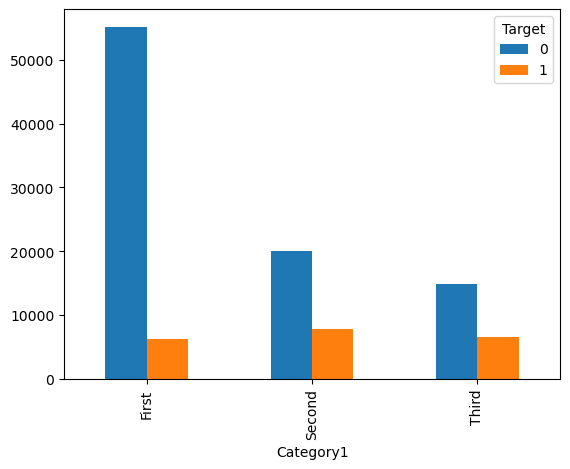

In [44]:
pd.crosstab(newdata.Category1, newdata.Target).plot(kind = "bar")

In [45]:
# Apply Frequency on the Cat 1, Cat2, Cat3
newdata["Category1"] = pd.factorize(newdata.Category1)[0]
newdata["Category2"] = pd.factorize(newdata.Category2)[0]

In [46]:
#Drop the Donation Column
newdata.drop("Donation", axis = 1, inplace = True)

In [47]:
# Replace Income, Education and Age by np.nan

newdata.replace(to_replace="None", value = np.NaN, inplace = True)

In [48]:
# Drop the additional columns
newdata.drop(["Health_Score", "Health Score", 
              "Number_of_stall_visited", "Last_Stall_Visited_Number"], 
             axis = 1, inplace = True)

In [49]:
newdata.head(2)

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Day,Patients_Per_Month,Patients_Per_Year,Patient_Frequency_Per_Day,Patient_Frequency_Per_Month,Patient_Frequency_Per_Year,Patient_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,2649.0,6585.0,15710.0,9,7,3,2837,19,1
1,45,5,0,0,7,1,75,40,C,Others,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,3620.0,5804.0,15710.0,16,12,4,2837,19,0


In [50]:
newdata["Income"] = pd.factorize(newdata.Income)[0]
newdata["Education_Score"] = pd.factorize(newdata.Education_Score)[0]
newdata["City_Type"] = pd.factorize(newdata.City_Type)[0]
newdata["Employer_Category"] = pd.factorize(newdata.Employer_Category)[0]

In [51]:
# Tip: Use KBins Discretizer to deal with Numerical Data...
newdata.Age.describe()

count     32602
unique       50
top          41
freq       2568
Name: Age, dtype: object

In [52]:
newdata["Age"] = newdata.Age.astype("float")

In [53]:
newdata["Age"] = pd.factorize(newdata.Age)[0]

In [57]:
newdata.isnull().sum()[newdata.isnull().sum()!=0]

Series([], dtype: int64)

In [55]:
cols = ['Interaction_Days', 'magic1', 'magic2', 'Registration_Days',
       'Registration_Month', 'Registration_Year', 'Patients_Per_Day',
       'Patients_Per_Month', 'Patients_Per_Year']

for i in cols:
    newdata.loc[:, i].fillna(newdata.loc[:,i].median(), inplace = True)

### Modelling

In [62]:
# Split the Data in train and test
newtrain = newdata.loc[0:train.shape[0]-1, :]
newtest = newdata.loc[train.shape[0]:, :]

In [63]:
# Drop the target from train and test
X = newtrain.drop("Target", axis = 1)
newtest = newtest.drop("Target", axis = 1)
y = newtrain.Target

In [64]:
# Import the Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [66]:
# Import more libraries...
from sklearn.model_selection import cross_val_score, StratifiedKFold

def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models["tree"] = DecisionTreeClassifier(criterion = "entropy")
    models['rf'] = RandomForestClassifier(criterion = "entropy")
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    models["catboost"] = CatBoostClassifier()
    return models

In [73]:
# Evaluation Function...
#from sklearn.metrics import f1_score
def eval_score(model):
    cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    score = cross_val_score(model, X, y, 
                           scoring = "roc_auc", 
                            cv = cv, error_score="raise",
                           n_jobs = -1)
    return score

In [74]:
# Build the Models....
models = base_models()
result, names = list(), list()
for name, model in models.items():
    finalscore = eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'% (name, np.mean(result), np.std(result)))

lg 0.701 (0.004)
tree 0.718 (0.018)
rf 0.775 (0.082)
gbm 0.797 (0.081)
xgb 0.814 (0.079)
lgbm 0.824 (0.076)
catboost 0.832 (0.073)


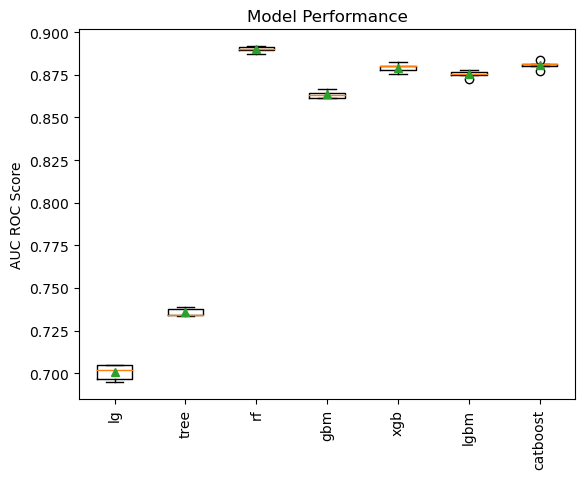

In [75]:
plt.boxplot(result, labels = names, showmeans=True)
plt.xticks(rotation = 90)
plt.ylabel("AUC ROC Score")
plt.title("Model Performance")
plt.show()

In [80]:
# Lets start with XGBOOST
xgb = XGBClassifier()
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

pred_xgb = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain, ytrain).predict_proba(newtest))

In [94]:
# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_xgb)[0])[1]

In [95]:
submission.to_csv("XGBModel_health.csv", index = False) # 0.7575

In [97]:
# Lets start with LGBM
lgbm = LGBMClassifier()
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lgbm = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict_proba(newtest))
    

# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_lgbm)[0])[1]

In [98]:
submission.to_csv("LGBMModel_health.csv", index = False) # 0.7777

In [99]:
# Lets start with CATBOOST
cboost = CatBoostClassifier()
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

pred_lgbm = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(cboost.fit(xtrain, ytrain).predict_proba(newtest))
    

# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_lgbm)[0])[1]

Learning rate set to 0.059277
0:	learn: 0.6561714	total: 263ms	remaining: 4m 22s
1:	learn: 0.6231708	total: 276ms	remaining: 2m 17s
2:	learn: 0.5945105	total: 286ms	remaining: 1m 35s
3:	learn: 0.5709654	total: 295ms	remaining: 1m 13s
4:	learn: 0.5505144	total: 312ms	remaining: 1m 2s
5:	learn: 0.5342755	total: 321ms	remaining: 53.1s
6:	learn: 0.5195151	total: 339ms	remaining: 48.1s
7:	learn: 0.5052490	total: 347ms	remaining: 43.1s
8:	learn: 0.4939886	total: 355ms	remaining: 39.1s
9:	learn: 0.4847838	total: 363ms	remaining: 35.9s
10:	learn: 0.4764202	total: 371ms	remaining: 33.3s
11:	learn: 0.4687268	total: 380ms	remaining: 31.3s
12:	learn: 0.4625256	total: 389ms	remaining: 29.5s
13:	learn: 0.4567362	total: 398ms	remaining: 28s
14:	learn: 0.4506314	total: 407ms	remaining: 26.7s
15:	learn: 0.4458441	total: 419ms	remaining: 25.7s
16:	learn: 0.4418192	total: 444ms	remaining: 25.6s
17:	learn: 0.4384055	total: 452ms	remaining: 24.6s
18:	learn: 0.4351618	total: 461ms	remaining: 23.8s
19:	learn

179:	learn: 0.3841723	total: 2.03s	remaining: 9.27s
180:	learn: 0.3840502	total: 2.04s	remaining: 9.25s
181:	learn: 0.3839719	total: 2.07s	remaining: 9.29s
182:	learn: 0.3837740	total: 2.08s	remaining: 9.28s
183:	learn: 0.3836852	total: 2.09s	remaining: 9.26s
184:	learn: 0.3835801	total: 2.1s	remaining: 9.26s
185:	learn: 0.3834480	total: 2.11s	remaining: 9.23s
186:	learn: 0.3833642	total: 2.12s	remaining: 9.21s
187:	learn: 0.3832822	total: 2.13s	remaining: 9.18s
188:	learn: 0.3832010	total: 2.13s	remaining: 9.15s
189:	learn: 0.3831208	total: 2.15s	remaining: 9.17s
190:	learn: 0.3830102	total: 2.16s	remaining: 9.14s
191:	learn: 0.3829006	total: 2.17s	remaining: 9.11s
192:	learn: 0.3828329	total: 2.17s	remaining: 9.09s
193:	learn: 0.3826708	total: 2.18s	remaining: 9.06s
194:	learn: 0.3824970	total: 2.19s	remaining: 9.03s
195:	learn: 0.3824082	total: 2.19s	remaining: 9s
196:	learn: 0.3822596	total: 2.2s	remaining: 8.97s
197:	learn: 0.3821537	total: 2.21s	remaining: 8.96s
198:	learn: 0.381

347:	learn: 0.3665631	total: 3.7s	remaining: 6.94s
348:	learn: 0.3664341	total: 3.72s	remaining: 6.93s
349:	learn: 0.3663317	total: 3.73s	remaining: 6.92s
350:	learn: 0.3662615	total: 3.74s	remaining: 6.91s
351:	learn: 0.3661700	total: 3.75s	remaining: 6.9s
352:	learn: 0.3660794	total: 3.77s	remaining: 6.9s
353:	learn: 0.3659965	total: 3.8s	remaining: 6.93s
354:	learn: 0.3659441	total: 3.81s	remaining: 6.92s
355:	learn: 0.3658340	total: 3.82s	remaining: 6.91s
356:	learn: 0.3657978	total: 3.83s	remaining: 6.9s
357:	learn: 0.3657406	total: 3.84s	remaining: 6.89s
358:	learn: 0.3656263	total: 3.85s	remaining: 6.88s
359:	learn: 0.3655233	total: 3.86s	remaining: 6.87s
360:	learn: 0.3654541	total: 3.9s	remaining: 6.9s
361:	learn: 0.3653519	total: 3.91s	remaining: 6.89s
362:	learn: 0.3652602	total: 3.92s	remaining: 6.88s
363:	learn: 0.3651824	total: 3.93s	remaining: 6.88s
364:	learn: 0.3650622	total: 3.95s	remaining: 6.87s
365:	learn: 0.3649930	total: 3.97s	remaining: 6.87s
366:	learn: 0.36487

514:	learn: 0.3537019	total: 5.54s	remaining: 5.22s
515:	learn: 0.3536667	total: 5.55s	remaining: 5.21s
516:	learn: 0.3536300	total: 5.56s	remaining: 5.19s
517:	learn: 0.3535534	total: 5.57s	remaining: 5.19s
518:	learn: 0.3534686	total: 5.58s	remaining: 5.17s
519:	learn: 0.3534250	total: 5.59s	remaining: 5.16s
520:	learn: 0.3533526	total: 5.61s	remaining: 5.16s
521:	learn: 0.3533053	total: 5.62s	remaining: 5.14s
522:	learn: 0.3532245	total: 5.62s	remaining: 5.13s
523:	learn: 0.3531600	total: 5.63s	remaining: 5.11s
524:	learn: 0.3530439	total: 5.64s	remaining: 5.1s
525:	learn: 0.3529981	total: 5.64s	remaining: 5.09s
526:	learn: 0.3529779	total: 5.65s	remaining: 5.07s
527:	learn: 0.3529392	total: 5.66s	remaining: 5.06s
528:	learn: 0.3528456	total: 5.66s	remaining: 5.04s
529:	learn: 0.3528059	total: 5.67s	remaining: 5.03s
530:	learn: 0.3527509	total: 5.68s	remaining: 5.01s
531:	learn: 0.3526735	total: 5.71s	remaining: 5.02s
532:	learn: 0.3526098	total: 5.71s	remaining: 5.01s
533:	learn: 0

695:	learn: 0.3420131	total: 7.24s	remaining: 3.16s
696:	learn: 0.3419512	total: 7.25s	remaining: 3.15s
697:	learn: 0.3419241	total: 7.26s	remaining: 3.14s
698:	learn: 0.3418973	total: 7.27s	remaining: 3.13s
699:	learn: 0.3418261	total: 7.27s	remaining: 3.12s
700:	learn: 0.3417517	total: 7.28s	remaining: 3.11s
701:	learn: 0.3417236	total: 7.29s	remaining: 3.09s
702:	learn: 0.3416849	total: 7.3s	remaining: 3.08s
703:	learn: 0.3416362	total: 7.31s	remaining: 3.07s
704:	learn: 0.3415797	total: 7.33s	remaining: 3.07s
705:	learn: 0.3414947	total: 7.34s	remaining: 3.06s
706:	learn: 0.3414241	total: 7.34s	remaining: 3.04s
707:	learn: 0.3413722	total: 7.36s	remaining: 3.03s
708:	learn: 0.3413503	total: 7.37s	remaining: 3.02s
709:	learn: 0.3413155	total: 7.38s	remaining: 3.01s
710:	learn: 0.3412609	total: 7.38s	remaining: 3s
711:	learn: 0.3411967	total: 7.39s	remaining: 2.99s
712:	learn: 0.3411391	total: 7.4s	remaining: 2.98s
713:	learn: 0.3410881	total: 7.42s	remaining: 2.97s
714:	learn: 0.341

871:	learn: 0.3317634	total: 8.9s	remaining: 1.31s
872:	learn: 0.3317131	total: 8.92s	remaining: 1.3s
873:	learn: 0.3316220	total: 8.94s	remaining: 1.29s
874:	learn: 0.3315596	total: 8.96s	remaining: 1.28s
875:	learn: 0.3315146	total: 8.97s	remaining: 1.27s
876:	learn: 0.3314510	total: 8.98s	remaining: 1.26s
877:	learn: 0.3313975	total: 8.99s	remaining: 1.25s
878:	learn: 0.3313287	total: 9.01s	remaining: 1.24s
879:	learn: 0.3312885	total: 9.02s	remaining: 1.23s
880:	learn: 0.3312408	total: 9.03s	remaining: 1.22s
881:	learn: 0.3311789	total: 9.06s	remaining: 1.21s
882:	learn: 0.3311424	total: 9.07s	remaining: 1.2s
883:	learn: 0.3310750	total: 9.08s	remaining: 1.19s
884:	learn: 0.3310343	total: 9.09s	remaining: 1.18s
885:	learn: 0.3309740	total: 9.1s	remaining: 1.17s
886:	learn: 0.3308996	total: 9.12s	remaining: 1.16s
887:	learn: 0.3308345	total: 9.13s	remaining: 1.15s
888:	learn: 0.3308087	total: 9.14s	remaining: 1.14s
889:	learn: 0.3307560	total: 9.15s	remaining: 1.13s
890:	learn: 0.33

42:	learn: 0.4083215	total: 405ms	remaining: 9.01s
43:	learn: 0.4079656	total: 413ms	remaining: 8.98s
44:	learn: 0.4075610	total: 421ms	remaining: 8.93s
45:	learn: 0.4071402	total: 428ms	remaining: 8.88s
46:	learn: 0.4069031	total: 446ms	remaining: 9.05s
47:	learn: 0.4065022	total: 454ms	remaining: 9s
48:	learn: 0.4062116	total: 461ms	remaining: 8.95s
49:	learn: 0.4057316	total: 476ms	remaining: 9.05s
50:	learn: 0.4052928	total: 484ms	remaining: 9.01s
51:	learn: 0.4049952	total: 492ms	remaining: 8.96s
52:	learn: 0.4046729	total: 499ms	remaining: 8.92s
53:	learn: 0.4044064	total: 507ms	remaining: 8.87s
54:	learn: 0.4041481	total: 514ms	remaining: 8.83s
55:	learn: 0.4038409	total: 522ms	remaining: 8.8s
56:	learn: 0.4034900	total: 539ms	remaining: 8.91s
57:	learn: 0.4031682	total: 547ms	remaining: 8.88s
58:	learn: 0.4028647	total: 555ms	remaining: 8.85s
59:	learn: 0.4025925	total: 562ms	remaining: 8.81s
60:	learn: 0.4023454	total: 571ms	remaining: 8.79s
61:	learn: 0.4020184	total: 580ms	r

211:	learn: 0.3810831	total: 2s	remaining: 7.45s
212:	learn: 0.3809855	total: 2.02s	remaining: 7.45s
213:	learn: 0.3808799	total: 2.03s	remaining: 7.45s
214:	learn: 0.3807702	total: 2.04s	remaining: 7.43s
215:	learn: 0.3806372	total: 2.04s	remaining: 7.42s
216:	learn: 0.3804869	total: 2.05s	remaining: 7.41s
217:	learn: 0.3803642	total: 2.06s	remaining: 7.39s
218:	learn: 0.3800550	total: 2.08s	remaining: 7.41s
219:	learn: 0.3799082	total: 2.08s	remaining: 7.39s
220:	learn: 0.3797912	total: 2.09s	remaining: 7.38s
221:	learn: 0.3797059	total: 2.1s	remaining: 7.36s
222:	learn: 0.3796285	total: 2.11s	remaining: 7.34s
223:	learn: 0.3795427	total: 2.11s	remaining: 7.32s
224:	learn: 0.3792789	total: 2.12s	remaining: 7.31s
225:	learn: 0.3790255	total: 2.13s	remaining: 7.29s
226:	learn: 0.3789596	total: 2.14s	remaining: 7.29s
227:	learn: 0.3788543	total: 2.15s	remaining: 7.28s
228:	learn: 0.3787275	total: 2.17s	remaining: 7.3s
229:	learn: 0.3786039	total: 2.17s	remaining: 7.28s
230:	learn: 0.378

379:	learn: 0.3642228	total: 3.65s	remaining: 5.96s
380:	learn: 0.3642129	total: 3.67s	remaining: 5.96s
381:	learn: 0.3641370	total: 3.68s	remaining: 5.95s
382:	learn: 0.3640380	total: 3.69s	remaining: 5.95s
383:	learn: 0.3639627	total: 3.72s	remaining: 5.97s
384:	learn: 0.3638738	total: 3.73s	remaining: 5.97s
385:	learn: 0.3637838	total: 3.75s	remaining: 5.96s
386:	learn: 0.3636826	total: 3.76s	remaining: 5.95s
387:	learn: 0.3635869	total: 3.77s	remaining: 5.94s
388:	learn: 0.3635260	total: 3.78s	remaining: 5.93s
389:	learn: 0.3634681	total: 3.8s	remaining: 5.95s
390:	learn: 0.3633853	total: 3.82s	remaining: 5.95s
391:	learn: 0.3633221	total: 3.83s	remaining: 5.94s
392:	learn: 0.3632564	total: 3.84s	remaining: 5.93s
393:	learn: 0.3631822	total: 3.85s	remaining: 5.92s
394:	learn: 0.3631200	total: 3.85s	remaining: 5.91s
395:	learn: 0.3630325	total: 3.86s	remaining: 5.89s
396:	learn: 0.3629736	total: 3.87s	remaining: 5.88s
397:	learn: 0.3628326	total: 3.88s	remaining: 5.87s
398:	learn: 0

549:	learn: 0.3513960	total: 5.28s	remaining: 4.32s
550:	learn: 0.3513229	total: 5.29s	remaining: 4.31s
551:	learn: 0.3512468	total: 5.29s	remaining: 4.3s
552:	learn: 0.3511541	total: 5.3s	remaining: 4.29s
553:	learn: 0.3510842	total: 5.31s	remaining: 4.27s
554:	learn: 0.3510414	total: 5.32s	remaining: 4.26s
555:	learn: 0.3509402	total: 5.34s	remaining: 4.26s
556:	learn: 0.3508611	total: 5.35s	remaining: 4.25s
557:	learn: 0.3507962	total: 5.35s	remaining: 4.24s
558:	learn: 0.3507245	total: 5.37s	remaining: 4.24s
559:	learn: 0.3506237	total: 5.38s	remaining: 4.23s
560:	learn: 0.3505332	total: 5.39s	remaining: 4.22s
561:	learn: 0.3504603	total: 5.4s	remaining: 4.21s
562:	learn: 0.3504250	total: 5.4s	remaining: 4.2s
563:	learn: 0.3503518	total: 5.42s	remaining: 4.19s
564:	learn: 0.3502655	total: 5.43s	remaining: 4.18s
565:	learn: 0.3501991	total: 5.44s	remaining: 4.17s
566:	learn: 0.3501488	total: 5.45s	remaining: 4.16s
567:	learn: 0.3500264	total: 5.45s	remaining: 4.15s
568:	learn: 0.349

724:	learn: 0.3401062	total: 6.92s	remaining: 2.63s
725:	learn: 0.3400609	total: 6.93s	remaining: 2.62s
726:	learn: 0.3399626	total: 6.94s	remaining: 2.61s
727:	learn: 0.3399050	total: 6.95s	remaining: 2.6s
728:	learn: 0.3398392	total: 6.97s	remaining: 2.59s
729:	learn: 0.3397711	total: 6.97s	remaining: 2.58s
730:	learn: 0.3397084	total: 6.98s	remaining: 2.57s
731:	learn: 0.3396389	total: 6.99s	remaining: 2.56s
732:	learn: 0.3395616	total: 7s	remaining: 2.55s
733:	learn: 0.3394892	total: 7.01s	remaining: 2.54s
734:	learn: 0.3394403	total: 7.01s	remaining: 2.53s
735:	learn: 0.3393733	total: 7.02s	remaining: 2.52s
736:	learn: 0.3393426	total: 7.04s	remaining: 2.51s
737:	learn: 0.3392942	total: 7.06s	remaining: 2.5s
738:	learn: 0.3392656	total: 7.07s	remaining: 2.5s
739:	learn: 0.3391932	total: 7.07s	remaining: 2.48s
740:	learn: 0.3391377	total: 7.08s	remaining: 2.48s
741:	learn: 0.3390449	total: 7.09s	remaining: 2.46s
742:	learn: 0.3389877	total: 7.1s	remaining: 2.45s
743:	learn: 0.33894

884:	learn: 0.3308830	total: 8.39s	remaining: 1.09s
885:	learn: 0.3308313	total: 8.4s	remaining: 1.08s
886:	learn: 0.3307772	total: 8.42s	remaining: 1.07s
887:	learn: 0.3307291	total: 8.43s	remaining: 1.06s
888:	learn: 0.3306619	total: 8.43s	remaining: 1.05s
889:	learn: 0.3306064	total: 8.44s	remaining: 1.04s
890:	learn: 0.3305646	total: 8.45s	remaining: 1.03s
891:	learn: 0.3305135	total: 8.45s	remaining: 1.02s
892:	learn: 0.3304593	total: 8.46s	remaining: 1.01s
893:	learn: 0.3304102	total: 8.47s	remaining: 1s
894:	learn: 0.3303303	total: 8.48s	remaining: 996ms
895:	learn: 0.3302569	total: 8.49s	remaining: 986ms
896:	learn: 0.3301974	total: 8.5s	remaining: 976ms
897:	learn: 0.3301300	total: 8.51s	remaining: 967ms
898:	learn: 0.3300796	total: 8.52s	remaining: 957ms
899:	learn: 0.3300277	total: 8.52s	remaining: 947ms
900:	learn: 0.3299735	total: 8.53s	remaining: 937ms
901:	learn: 0.3299072	total: 8.54s	remaining: 928ms
902:	learn: 0.3298511	total: 8.55s	remaining: 918ms
903:	learn: 0.329

57:	learn: 0.4044551	total: 582ms	remaining: 9.45s
58:	learn: 0.4040979	total: 591ms	remaining: 9.43s
59:	learn: 0.4037563	total: 600ms	remaining: 9.4s
60:	learn: 0.4034638	total: 608ms	remaining: 9.36s
61:	learn: 0.4031344	total: 616ms	remaining: 9.32s
62:	learn: 0.4028791	total: 624ms	remaining: 9.28s
63:	learn: 0.4025962	total: 631ms	remaining: 9.23s
64:	learn: 0.4023950	total: 649ms	remaining: 9.33s
65:	learn: 0.4022018	total: 656ms	remaining: 9.29s
66:	learn: 0.4020565	total: 664ms	remaining: 9.24s
67:	learn: 0.4017724	total: 671ms	remaining: 9.19s
68:	learn: 0.4016644	total: 681ms	remaining: 9.19s
69:	learn: 0.4013794	total: 693ms	remaining: 9.2s
70:	learn: 0.4010688	total: 701ms	remaining: 9.18s
71:	learn: 0.4007768	total: 709ms	remaining: 9.14s
72:	learn: 0.4005966	total: 717ms	remaining: 9.1s
73:	learn: 0.4004506	total: 724ms	remaining: 9.06s
74:	learn: 0.4001942	total: 742ms	remaining: 9.15s
75:	learn: 0.4000349	total: 749ms	remaining: 9.11s
76:	learn: 0.3998274	total: 757ms	

227:	learn: 0.3800176	total: 2.17s	remaining: 7.33s
228:	learn: 0.3799278	total: 2.18s	remaining: 7.34s
229:	learn: 0.3798378	total: 2.19s	remaining: 7.34s
230:	learn: 0.3797534	total: 2.2s	remaining: 7.32s
231:	learn: 0.3796597	total: 2.21s	remaining: 7.31s
232:	learn: 0.3795840	total: 2.21s	remaining: 7.29s
233:	learn: 0.3794935	total: 2.22s	remaining: 7.27s
234:	learn: 0.3794104	total: 2.24s	remaining: 7.28s
235:	learn: 0.3792294	total: 2.25s	remaining: 7.27s
236:	learn: 0.3790900	total: 2.25s	remaining: 7.25s
237:	learn: 0.3789877	total: 2.26s	remaining: 7.24s
238:	learn: 0.3788685	total: 2.28s	remaining: 7.25s
239:	learn: 0.3787831	total: 2.28s	remaining: 7.23s
240:	learn: 0.3786796	total: 2.29s	remaining: 7.22s
241:	learn: 0.3785797	total: 2.3s	remaining: 7.2s
242:	learn: 0.3784269	total: 2.31s	remaining: 7.18s
243:	learn: 0.3782953	total: 2.31s	remaining: 7.16s
244:	learn: 0.3782464	total: 2.32s	remaining: 7.15s
245:	learn: 0.3781504	total: 2.33s	remaining: 7.13s
246:	learn: 0.3

386:	learn: 0.3657537	total: 3.64s	remaining: 5.76s
387:	learn: 0.3656566	total: 3.65s	remaining: 5.75s
388:	learn: 0.3655531	total: 3.65s	remaining: 5.74s
389:	learn: 0.3654650	total: 3.67s	remaining: 5.73s
390:	learn: 0.3653573	total: 3.68s	remaining: 5.73s
391:	learn: 0.3652329	total: 3.69s	remaining: 5.72s
392:	learn: 0.3651494	total: 3.69s	remaining: 5.7s
393:	learn: 0.3650767	total: 3.7s	remaining: 5.69s
394:	learn: 0.3649478	total: 3.71s	remaining: 5.68s
395:	learn: 0.3648560	total: 3.72s	remaining: 5.68s
396:	learn: 0.3647572	total: 3.73s	remaining: 5.67s
397:	learn: 0.3646695	total: 3.74s	remaining: 5.66s
398:	learn: 0.3646527	total: 3.75s	remaining: 5.64s
399:	learn: 0.3645527	total: 3.75s	remaining: 5.63s
400:	learn: 0.3644927	total: 3.76s	remaining: 5.62s
401:	learn: 0.3643965	total: 3.77s	remaining: 5.61s
402:	learn: 0.3643117	total: 3.77s	remaining: 5.59s
403:	learn: 0.3642248	total: 3.79s	remaining: 5.58s
404:	learn: 0.3641529	total: 3.79s	remaining: 5.58s
405:	learn: 0.

545:	learn: 0.3537661	total: 5.26s	remaining: 4.38s
546:	learn: 0.3537399	total: 5.28s	remaining: 4.37s
547:	learn: 0.3536429	total: 5.29s	remaining: 4.36s
548:	learn: 0.3535551	total: 5.3s	remaining: 4.35s
549:	learn: 0.3534859	total: 5.3s	remaining: 4.34s
550:	learn: 0.3534324	total: 5.31s	remaining: 4.33s
551:	learn: 0.3533856	total: 5.32s	remaining: 4.32s
552:	learn: 0.3532665	total: 5.33s	remaining: 4.3s
553:	learn: 0.3532049	total: 5.33s	remaining: 4.29s
554:	learn: 0.3531449	total: 5.34s	remaining: 4.28s
555:	learn: 0.3531088	total: 5.36s	remaining: 4.28s
556:	learn: 0.3530193	total: 5.37s	remaining: 4.27s
557:	learn: 0.3529692	total: 5.38s	remaining: 4.26s
558:	learn: 0.3529147	total: 5.39s	remaining: 4.25s
559:	learn: 0.3528547	total: 5.4s	remaining: 4.24s
560:	learn: 0.3527798	total: 5.4s	remaining: 4.23s
561:	learn: 0.3526802	total: 5.41s	remaining: 4.22s
562:	learn: 0.3526154	total: 5.42s	remaining: 4.21s
563:	learn: 0.3525674	total: 5.42s	remaining: 4.19s
564:	learn: 0.352

725:	learn: 0.3420935	total: 6.88s	remaining: 2.6s
726:	learn: 0.3420123	total: 6.91s	remaining: 2.6s
727:	learn: 0.3419320	total: 6.92s	remaining: 2.59s
728:	learn: 0.3418665	total: 6.93s	remaining: 2.58s
729:	learn: 0.3418179	total: 6.94s	remaining: 2.57s
730:	learn: 0.3417546	total: 6.95s	remaining: 2.56s
731:	learn: 0.3416918	total: 6.96s	remaining: 2.55s
732:	learn: 0.3416534	total: 6.96s	remaining: 2.54s
733:	learn: 0.3415729	total: 6.97s	remaining: 2.53s
734:	learn: 0.3415442	total: 6.98s	remaining: 2.52s
735:	learn: 0.3414913	total: 6.99s	remaining: 2.51s
736:	learn: 0.3414234	total: 7s	remaining: 2.5s
737:	learn: 0.3413584	total: 7.01s	remaining: 2.49s
738:	learn: 0.3412965	total: 7.02s	remaining: 2.48s
739:	learn: 0.3412415	total: 7.03s	remaining: 2.47s
740:	learn: 0.3411974	total: 7.04s	remaining: 2.46s
741:	learn: 0.3411347	total: 7.05s	remaining: 2.45s
742:	learn: 0.3410588	total: 7.05s	remaining: 2.44s
743:	learn: 0.3409752	total: 7.06s	remaining: 2.43s
744:	learn: 0.3408

904:	learn: 0.3313238	total: 8.51s	remaining: 894ms
905:	learn: 0.3312750	total: 8.53s	remaining: 885ms
906:	learn: 0.3312218	total: 8.54s	remaining: 876ms
907:	learn: 0.3311778	total: 8.54s	remaining: 866ms
908:	learn: 0.3311068	total: 8.55s	remaining: 856ms
909:	learn: 0.3310665	total: 8.56s	remaining: 847ms
910:	learn: 0.3310072	total: 8.57s	remaining: 837ms
911:	learn: 0.3309672	total: 8.58s	remaining: 828ms
912:	learn: 0.3309080	total: 8.59s	remaining: 818ms
913:	learn: 0.3308676	total: 8.6s	remaining: 809ms
914:	learn: 0.3308202	total: 8.6s	remaining: 799ms
915:	learn: 0.3307760	total: 8.62s	remaining: 791ms
916:	learn: 0.3307333	total: 8.63s	remaining: 781ms
917:	learn: 0.3306622	total: 8.64s	remaining: 772ms
918:	learn: 0.3306124	total: 8.64s	remaining: 762ms
919:	learn: 0.3305518	total: 8.65s	remaining: 752ms
920:	learn: 0.3304988	total: 8.66s	remaining: 743ms
921:	learn: 0.3304238	total: 8.67s	remaining: 733ms
922:	learn: 0.3303889	total: 8.68s	remaining: 724ms
923:	learn: 0.

83:	learn: 0.3979131	total: 817ms	remaining: 8.91s
84:	learn: 0.3976863	total: 826ms	remaining: 8.89s
85:	learn: 0.3975066	total: 836ms	remaining: 8.88s
86:	learn: 0.3973893	total: 844ms	remaining: 8.86s
87:	learn: 0.3972340	total: 852ms	remaining: 8.83s
88:	learn: 0.3971208	total: 859ms	remaining: 8.8s
89:	learn: 0.3968803	total: 867ms	remaining: 8.77s
90:	learn: 0.3967809	total: 886ms	remaining: 8.85s
91:	learn: 0.3965973	total: 894ms	remaining: 8.83s
92:	learn: 0.3964181	total: 903ms	remaining: 8.81s
93:	learn: 0.3962398	total: 911ms	remaining: 8.78s
94:	learn: 0.3960726	total: 919ms	remaining: 8.76s
95:	learn: 0.3959724	total: 934ms	remaining: 8.79s
96:	learn: 0.3957788	total: 943ms	remaining: 8.77s
97:	learn: 0.3956561	total: 950ms	remaining: 8.75s
98:	learn: 0.3954571	total: 958ms	remaining: 8.72s
99:	learn: 0.3952751	total: 976ms	remaining: 8.79s
100:	learn: 0.3950747	total: 984ms	remaining: 8.76s
101:	learn: 0.3949380	total: 992ms	remaining: 8.73s
102:	learn: 0.3947487	total: 9

253:	learn: 0.3762365	total: 2.43s	remaining: 7.14s
254:	learn: 0.3760429	total: 2.44s	remaining: 7.13s
255:	learn: 0.3759258	total: 2.45s	remaining: 7.11s
256:	learn: 0.3757394	total: 2.45s	remaining: 7.1s
257:	learn: 0.3755893	total: 2.46s	remaining: 7.08s
258:	learn: 0.3754884	total: 2.47s	remaining: 7.07s
259:	learn: 0.3753966	total: 2.48s	remaining: 7.06s
260:	learn: 0.3752585	total: 2.49s	remaining: 7.06s
261:	learn: 0.3751448	total: 2.5s	remaining: 7.04s
262:	learn: 0.3750359	total: 2.52s	remaining: 7.06s
263:	learn: 0.3749616	total: 2.52s	remaining: 7.04s
264:	learn: 0.3748494	total: 2.53s	remaining: 7.03s
265:	learn: 0.3747731	total: 2.54s	remaining: 7.01s
266:	learn: 0.3747107	total: 2.55s	remaining: 6.99s
267:	learn: 0.3745844	total: 2.56s	remaining: 6.98s
268:	learn: 0.3745147	total: 2.56s	remaining: 6.96s
269:	learn: 0.3743636	total: 2.57s	remaining: 6.95s
270:	learn: 0.3742980	total: 2.58s	remaining: 6.93s
271:	learn: 0.3741843	total: 2.58s	remaining: 6.92s
272:	learn: 0.

432:	learn: 0.3598380	total: 4.1s	remaining: 5.37s
433:	learn: 0.3597582	total: 4.11s	remaining: 5.36s
434:	learn: 0.3596827	total: 4.12s	remaining: 5.35s
435:	learn: 0.3596178	total: 4.13s	remaining: 5.34s
436:	learn: 0.3595440	total: 4.15s	remaining: 5.35s
437:	learn: 0.3594628	total: 4.16s	remaining: 5.34s
438:	learn: 0.3594025	total: 4.17s	remaining: 5.33s
439:	learn: 0.3593544	total: 4.18s	remaining: 5.32s
440:	learn: 0.3592657	total: 4.18s	remaining: 5.3s
441:	learn: 0.3591971	total: 4.19s	remaining: 5.29s
442:	learn: 0.3591326	total: 4.2s	remaining: 5.28s
443:	learn: 0.3590950	total: 4.21s	remaining: 5.27s
444:	learn: 0.3590331	total: 4.21s	remaining: 5.26s
445:	learn: 0.3589624	total: 4.23s	remaining: 5.26s
446:	learn: 0.3588855	total: 4.24s	remaining: 5.24s
447:	learn: 0.3587920	total: 4.25s	remaining: 5.23s
448:	learn: 0.3587324	total: 4.25s	remaining: 5.22s
449:	learn: 0.3586517	total: 4.26s	remaining: 5.21s
450:	learn: 0.3586050	total: 4.28s	remaining: 5.21s
451:	learn: 0.3

592:	learn: 0.3479215	total: 5.76s	remaining: 3.95s
593:	learn: 0.3478297	total: 5.77s	remaining: 3.94s
594:	learn: 0.3477398	total: 5.79s	remaining: 3.94s
595:	learn: 0.3476826	total: 5.79s	remaining: 3.93s
596:	learn: 0.3476141	total: 5.8s	remaining: 3.92s
597:	learn: 0.3475494	total: 5.81s	remaining: 3.91s
598:	learn: 0.3474823	total: 5.82s	remaining: 3.9s
599:	learn: 0.3474051	total: 5.83s	remaining: 3.88s
600:	learn: 0.3473408	total: 5.84s	remaining: 3.88s
601:	learn: 0.3472817	total: 5.85s	remaining: 3.87s
602:	learn: 0.3472170	total: 5.86s	remaining: 3.86s
603:	learn: 0.3471478	total: 5.87s	remaining: 3.85s
604:	learn: 0.3470738	total: 5.88s	remaining: 3.84s
605:	learn: 0.3470020	total: 5.89s	remaining: 3.83s
606:	learn: 0.3469467	total: 5.9s	remaining: 3.82s
607:	learn: 0.3468784	total: 5.91s	remaining: 3.81s
608:	learn: 0.3468264	total: 5.92s	remaining: 3.8s
609:	learn: 0.3467939	total: 5.93s	remaining: 3.79s
610:	learn: 0.3467377	total: 5.93s	remaining: 3.78s
611:	learn: 0.34

765:	learn: 0.3367927	total: 7.4s	remaining: 2.26s
766:	learn: 0.3366911	total: 7.41s	remaining: 2.25s
767:	learn: 0.3366321	total: 7.42s	remaining: 2.24s
768:	learn: 0.3365635	total: 7.43s	remaining: 2.23s
769:	learn: 0.3365114	total: 7.44s	remaining: 2.22s
770:	learn: 0.3364665	total: 7.44s	remaining: 2.21s
771:	learn: 0.3364045	total: 7.45s	remaining: 2.2s
772:	learn: 0.3363457	total: 7.46s	remaining: 2.19s
773:	learn: 0.3362921	total: 7.46s	remaining: 2.18s
774:	learn: 0.3362503	total: 7.47s	remaining: 2.17s
775:	learn: 0.3361935	total: 7.48s	remaining: 2.16s
776:	learn: 0.3361393	total: 7.5s	remaining: 2.15s
777:	learn: 0.3360741	total: 7.51s	remaining: 2.14s
778:	learn: 0.3360021	total: 7.52s	remaining: 2.13s
779:	learn: 0.3359533	total: 7.53s	remaining: 2.12s
780:	learn: 0.3359201	total: 7.54s	remaining: 2.11s
781:	learn: 0.3358411	total: 7.55s	remaining: 2.1s
782:	learn: 0.3357602	total: 7.56s	remaining: 2.09s
783:	learn: 0.3357118	total: 7.56s	remaining: 2.08s
784:	learn: 0.33

936:	learn: 0.3266558	total: 9.01s	remaining: 606ms
937:	learn: 0.3266178	total: 9.01s	remaining: 596ms
938:	learn: 0.3265806	total: 9.04s	remaining: 587ms
939:	learn: 0.3265138	total: 9.06s	remaining: 578ms
940:	learn: 0.3264486	total: 9.07s	remaining: 568ms
941:	learn: 0.3263976	total: 9.07s	remaining: 559ms
942:	learn: 0.3263447	total: 9.08s	remaining: 549ms
943:	learn: 0.3262999	total: 9.09s	remaining: 539ms
944:	learn: 0.3262241	total: 9.1s	remaining: 529ms
945:	learn: 0.3261565	total: 9.11s	remaining: 520ms
946:	learn: 0.3261301	total: 9.12s	remaining: 510ms
947:	learn: 0.3260880	total: 9.13s	remaining: 501ms
948:	learn: 0.3260452	total: 9.14s	remaining: 491ms
949:	learn: 0.3259954	total: 9.14s	remaining: 481ms
950:	learn: 0.3259684	total: 9.15s	remaining: 472ms
951:	learn: 0.3259258	total: 9.16s	remaining: 462ms
952:	learn: 0.3258801	total: 9.17s	remaining: 452ms
953:	learn: 0.3258055	total: 9.18s	remaining: 443ms
954:	learn: 0.3257593	total: 9.19s	remaining: 433ms
955:	learn: 0

106:	learn: 0.3929512	total: 1.01s	remaining: 8.46s
107:	learn: 0.3927783	total: 1.03s	remaining: 8.55s
108:	learn: 0.3925405	total: 1.04s	remaining: 8.52s
109:	learn: 0.3923505	total: 1.05s	remaining: 8.5s
110:	learn: 0.3921462	total: 1.06s	remaining: 8.5s
111:	learn: 0.3919085	total: 1.07s	remaining: 8.52s
112:	learn: 0.3917441	total: 1.08s	remaining: 8.49s
113:	learn: 0.3916071	total: 1.09s	remaining: 8.47s
114:	learn: 0.3915212	total: 1.1s	remaining: 8.44s
115:	learn: 0.3913989	total: 1.1s	remaining: 8.41s
116:	learn: 0.3913128	total: 1.12s	remaining: 8.43s
117:	learn: 0.3912355	total: 1.13s	remaining: 8.43s
118:	learn: 0.3911114	total: 1.14s	remaining: 8.4s
119:	learn: 0.3909296	total: 1.14s	remaining: 8.38s
120:	learn: 0.3907803	total: 1.15s	remaining: 8.35s
121:	learn: 0.3906597	total: 1.16s	remaining: 8.33s
122:	learn: 0.3904778	total: 1.16s	remaining: 8.3s
123:	learn: 0.3903564	total: 1.17s	remaining: 8.28s
124:	learn: 0.3901664	total: 1.18s	remaining: 8.27s
125:	learn: 0.3900

283:	learn: 0.3714983	total: 2.62s	remaining: 6.61s
284:	learn: 0.3714174	total: 2.63s	remaining: 6.6s
285:	learn: 0.3713079	total: 2.64s	remaining: 6.59s
286:	learn: 0.3711974	total: 2.66s	remaining: 6.6s
287:	learn: 0.3710857	total: 2.66s	remaining: 6.59s
288:	learn: 0.3709745	total: 2.67s	remaining: 6.58s
289:	learn: 0.3709223	total: 2.68s	remaining: 6.56s
290:	learn: 0.3708001	total: 2.69s	remaining: 6.55s
291:	learn: 0.3707257	total: 2.69s	remaining: 6.53s
292:	learn: 0.3706710	total: 2.7s	remaining: 6.52s
293:	learn: 0.3705865	total: 2.71s	remaining: 6.5s
294:	learn: 0.3704657	total: 2.71s	remaining: 6.49s
295:	learn: 0.3703425	total: 2.72s	remaining: 6.47s
296:	learn: 0.3702232	total: 2.74s	remaining: 6.48s
297:	learn: 0.3701190	total: 2.75s	remaining: 6.49s
298:	learn: 0.3700043	total: 2.76s	remaining: 6.48s
299:	learn: 0.3698767	total: 2.77s	remaining: 6.46s
300:	learn: 0.3698162	total: 2.78s	remaining: 6.45s
301:	learn: 0.3697532	total: 2.79s	remaining: 6.44s
302:	learn: 0.36

448:	learn: 0.3572227	total: 4.47s	remaining: 5.49s
449:	learn: 0.3571602	total: 4.49s	remaining: 5.48s
450:	learn: 0.3570725	total: 4.5s	remaining: 5.47s
451:	learn: 0.3569848	total: 4.5s	remaining: 5.46s
452:	learn: 0.3569002	total: 4.51s	remaining: 5.45s
453:	learn: 0.3568376	total: 4.52s	remaining: 5.43s
454:	learn: 0.3567500	total: 4.53s	remaining: 5.43s
455:	learn: 0.3566674	total: 4.54s	remaining: 5.42s
456:	learn: 0.3565890	total: 4.55s	remaining: 5.41s
457:	learn: 0.3564991	total: 4.58s	remaining: 5.42s
458:	learn: 0.3564097	total: 4.59s	remaining: 5.41s
459:	learn: 0.3563227	total: 4.6s	remaining: 5.4s
460:	learn: 0.3562306	total: 4.61s	remaining: 5.39s
461:	learn: 0.3561315	total: 4.62s	remaining: 5.38s
462:	learn: 0.3560857	total: 4.63s	remaining: 5.37s
463:	learn: 0.3560037	total: 4.64s	remaining: 5.36s
464:	learn: 0.3559321	total: 4.67s	remaining: 5.37s
465:	learn: 0.3558574	total: 4.68s	remaining: 5.36s
466:	learn: 0.3557619	total: 4.69s	remaining: 5.35s
467:	learn: 0.35

624:	learn: 0.3444487	total: 6.54s	remaining: 3.93s
625:	learn: 0.3443751	total: 6.55s	remaining: 3.92s
626:	learn: 0.3443478	total: 6.58s	remaining: 3.92s
627:	learn: 0.3442631	total: 6.59s	remaining: 3.91s
628:	learn: 0.3441900	total: 6.6s	remaining: 3.9s
629:	learn: 0.3441216	total: 6.61s	remaining: 3.88s
630:	learn: 0.3440408	total: 6.62s	remaining: 3.87s
631:	learn: 0.3439553	total: 6.63s	remaining: 3.86s
632:	learn: 0.3438926	total: 6.64s	remaining: 3.85s
633:	learn: 0.3438687	total: 6.64s	remaining: 3.84s
634:	learn: 0.3437976	total: 6.66s	remaining: 3.83s
635:	learn: 0.3437466	total: 6.67s	remaining: 3.82s
636:	learn: 0.3436825	total: 6.68s	remaining: 3.81s
637:	learn: 0.3436088	total: 6.69s	remaining: 3.8s
638:	learn: 0.3435831	total: 6.7s	remaining: 3.79s
639:	learn: 0.3434853	total: 6.71s	remaining: 3.77s
640:	learn: 0.3434402	total: 6.72s	remaining: 3.76s
641:	learn: 0.3433555	total: 6.73s	remaining: 3.75s
642:	learn: 0.3433076	total: 6.74s	remaining: 3.74s
643:	learn: 0.34

791:	learn: 0.3342298	total: 8.19s	remaining: 2.15s
792:	learn: 0.3341902	total: 8.21s	remaining: 2.14s
793:	learn: 0.3341142	total: 8.22s	remaining: 2.13s
794:	learn: 0.3340614	total: 8.23s	remaining: 2.12s
795:	learn: 0.3339968	total: 8.24s	remaining: 2.11s
796:	learn: 0.3339219	total: 8.26s	remaining: 2.1s
797:	learn: 0.3338543	total: 8.27s	remaining: 2.09s
798:	learn: 0.3338133	total: 8.28s	remaining: 2.08s
799:	learn: 0.3337415	total: 8.3s	remaining: 2.08s
800:	learn: 0.3336904	total: 8.31s	remaining: 2.06s
801:	learn: 0.3336135	total: 8.32s	remaining: 2.05s
802:	learn: 0.3335607	total: 8.33s	remaining: 2.04s
803:	learn: 0.3335325	total: 8.34s	remaining: 2.03s
804:	learn: 0.3334705	total: 8.35s	remaining: 2.02s
805:	learn: 0.3334074	total: 8.36s	remaining: 2.01s
806:	learn: 0.3333437	total: 8.37s	remaining: 2s
807:	learn: 0.3332798	total: 8.4s	remaining: 2s
808:	learn: 0.3332239	total: 8.4s	remaining: 1.98s
809:	learn: 0.3331533	total: 8.41s	remaining: 1.97s
810:	learn: 0.3331010	

958:	learn: 0.3249640	total: 9.81s	remaining: 420ms
959:	learn: 0.3249001	total: 9.82s	remaining: 409ms
960:	learn: 0.3248350	total: 9.84s	remaining: 400ms
961:	learn: 0.3247859	total: 9.85s	remaining: 389ms
962:	learn: 0.3247117	total: 9.86s	remaining: 379ms
963:	learn: 0.3246675	total: 9.87s	remaining: 368ms
964:	learn: 0.3246370	total: 9.87s	remaining: 358ms
965:	learn: 0.3245917	total: 9.88s	remaining: 348ms
966:	learn: 0.3245499	total: 9.89s	remaining: 337ms
967:	learn: 0.3244993	total: 9.89s	remaining: 327ms
968:	learn: 0.3244392	total: 9.9s	remaining: 317ms
969:	learn: 0.3243793	total: 9.91s	remaining: 307ms
970:	learn: 0.3243304	total: 9.92s	remaining: 296ms
971:	learn: 0.3242695	total: 9.94s	remaining: 286ms
972:	learn: 0.3242177	total: 9.95s	remaining: 276ms
973:	learn: 0.3241778	total: 9.95s	remaining: 266ms
974:	learn: 0.3241353	total: 9.96s	remaining: 255ms
975:	learn: 0.3240889	total: 9.97s	remaining: 245ms
976:	learn: 0.3240533	total: 9.97s	remaining: 235ms
977:	learn: 0

In [100]:
submission.to_csv("CATBOOST_health.csv", index = False) # 0.75

In [101]:
# Stacking Model
base = [('xgb', XGBClassifier())]
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators=base, 
                           final_estimator=LGBMClassifier(), 
                           cv = cv)

pred_lgbm = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred_lgbm.append(stack.fit(xtrain, ytrain).predict_proba(newtest))
    
# Generate the Predicted Values...
submission["Outcome"] = pd.DataFrame(np.array(pred_lgbm)[0])[1]

In [102]:
submission.to_csv("STACK_health.csv", index = False) # 0.75

### Suggestion:

One can now do parameter tuning of LGBM Classifier model to gain the edge in the performance